In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')                                                   # mounting google drive to the file to access the data

Mounted at /content/drive


In [ ]:
# installing all the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import string
import nltk
from nltk import punkt
import nltk.downloader
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import WhitespaceTokenizer 
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopWords = set(stopwords.words('english'))

In [ ]:
print(len(stopWords))

179


Data Loading and Data Cleaning

In [ ]:
root_dir = 'drive/My Drive'                                                     # root directory of the dataset
local_path = '/ISOT/'                                                           # folder of the stored ISOT dataset
data_dir = root_dir + local_path


data_path_real = data_dir + 'True.csv'                                          # defined path to the training data for real news
data_path_fake = data_dir + 'Fake.csv'                                          # defined path to the training data for fake news

In [ ]:
train_set_real= pd.read_csv(data_path_real)                                     # reading the csv file for real news content
train_set_real.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [ ]:
train_set_real = train_set_real.assign(label='1')                               # adding label 1 for all news thats real
train_set_real.head(3)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1


In [ ]:
train_set_real.shape

(21417, 5)

In [ ]:
train_set_real.isnull().sum()                                                   # checking for null values in all columns of real news

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
train_set_real.title.duplicated().sum()                                               # checking for duplicated values in all columns of real news

591

In [ ]:
train_set_real.text.duplicated().sum() 

225

In [ ]:
train_set_real.duplicated().sum() 

206

In [ ]:
train_set_real.drop_duplicates()                                                # dropping duplicates in all columns of real news

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
train_set_fake= pd.read_csv(data_path_fake)                                     # reading the csv file for fake news content
train_set_fake.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [ ]:
train_set_fake = train_set_fake.assign(label='0')                               # adding label 0 for all news thats fake
train_set_fake.head(3)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0


In [ ]:
train_set_fake.shape

(23481, 5)

In [ ]:
train_set_fake.isnull().sum()                                                   # checking for null values in all columns of fake news

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
train_set_fake.title.duplicated().sum()                                               # checking for duplicated values in all columns of fake news

5578

In [ ]:
train_set_fake.text.duplicated().sum()    

6026

In [ ]:
train_set_fake.duplicated().sum()  

3

In [ ]:
train_set_fake.drop_duplicates()                                                # dropping duplicates in all columns of fake news

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


Data Preprocessing

In [ ]:
ps=PorterStemmer()
wst= WhitespaceTokenizer() 

In [ ]:
import re

def lower_case (text):
    return text.lower()                                                         # converting text to lower case


def remove_number (text):                                                       # removing numbers from the text corpus
    text_new=""
    for num in text:
        if num.isdigit()==False:
            text_new=text_new+num
    return text_new


def remove_punctutaion(text):                                                   # removing punctuation 
    text_new=''
    for punc in text:
        if punc not in string.punctuation:
            text_new=text_new+punc
    return text_new


def remove_special_characters(text):                                            # Removing special characters
    text_new=''
    for char in text:
        if (char.isalnum()==True) or (char==' '):
            text_new=text_new+char
    return(text_new)


def remove_stopwords(text):                                                     # Removing english stopwords
    text_new=[]
    for word in text.split():
        if word not in stopwords.words('english'):
            text_new.append(word)
    return " ".join(text_new)


def stemming(text):                                                             # Stemming words to root words
    wordlist = word_tokenize(text)
    post_stem = [ps.stem(word) for word in wordlist]
    return ' '.join(post_stem)

 
def remove_whitespace(text):                                                    # Removing extra whitespaces
    return(wst.tokenize(text))


# def remove_url(text):                                                           # removing urls from text 
#   url_pattern = re.compile(r'https?://\S+|www\.\S+')
#   text_new=[]
#   for word in text.split():
#     if word not in url_pattern:
#       text_new.append(word)
#   return " ".join(text_new)


def remove_news_name(x):
    new=[]
    for a in x.split():
        if a not in ('video'):
            new.append(a)

    return " ".join(new)

def compose(f, g):
    return lambda x: f(g(x))

In [ ]:
final=compose(compose(compose(compose(compose(compose(compose(remove_whitespace,stemming),remove_news_name),remove_stopwords),remove_special_characters),remove_punctutaion),remove_number),lower_case)

In [ ]:
real = train_set_real.loc[train_set_real['label'] == '1'].sample(n=21211)        # taking 35% data as sample data from the real news dataset

In [ ]:
real.shape

(21211, 5)

In [ ]:
fake = train_set_fake.loc[train_set_fake['label'] == '0'].sample(n=21211)        # taking 32% data as sample data from the fake news dataset

In [ ]:
fake.shape

(21211, 5)

In [ ]:
concat_set=pd.concat([real, fake],axis=0)                                       # concatenating both the datasets to make one whole dataset of fake and real news

In [ ]:
concat_set.shape

(42422, 5)

In [ ]:
X=concat_set['text']                                                            # selecting feature for detection
Y=concat_set['label']

In [ ]:
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, stratify=Y, test_size=0.3,random_state=42, shuffle=True)          # Splitting the data in training an testing data at a 70-30 ratio

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape )

(29695,) (29695,) (12727,) (12727,)


In [ ]:
(x_train, x_val, y_train, y_val) = train_test_split(x_train, y_train, stratify=y_train, test_size=0.3, random_state=42, shuffle=True)          # Splitting the data in training an testing data at a 70-30 ratio

In [ ]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape )

(20786,) (20786,) (8909,) (8909,)


In [ ]:
le = preprocessing.LabelEncoder()                                               # transforms non numeric labels to numeric labels

x_train_set = le.fit_transform(x_train)                                         # converts training text to numeric one dimensional array
y_train_set = le.fit_transform(y_train)                                         # converts testing text to numeric one dimensional array

In [ ]:
x_train_re = x_train_set.reshape(-1,1)

y_train_re = y_train_set.reshape(-1,1)

In [ ]:
coun_vectorizer = CountVectorizer(max_features=5, analyzer=final)
count_matrix = coun_vectorizer.fit_transform(x_train)
count_array = count_matrix.toarray()
top_features = pd.DataFrame(data=count_array,columns = coun_vectorizer.get_feature_names())
print(top_features)

       presid  said  state  trump  us
0           0     2      1      0   0
1           1     0      0      0   0
2           0     2      0      0   3
3           3     0      2     12   8
4           0     3      0      5   0
...       ...   ...    ...    ...  ..
20781       0     2      0      5   1
20782       2     5      1      0   0
20783       1     4      2      3   3
20784       0     3      0      0   0
20785       2     0      0      4   2

[20786 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5, analyzer=final)
tfidf_matrix = tfidf_vectorizer.fit_transform(x_train)
tfidf_array = tfidf_matrix.toarray()
top_features = pd.DataFrame(data=tfidf_array,columns = tfidf_vectorizer.get_feature_names())
print(top_features)

         presid      said     state     trump        us
0      0.000000  0.833430  0.552625  0.000000  0.000000
1      1.000000  0.000000  0.000000  0.000000  0.000000
2      0.000000  0.458623  0.000000  0.000000  0.888631
3      0.194596  0.000000  0.137166  0.810989  0.534429
4      0.000000  0.417259  0.000000  0.908788  0.000000
...         ...       ...       ...       ...       ...
20781  0.000000  0.287594  0.000000  0.939568  0.185748
20782  0.436338  0.869712  0.230673  0.000000  0.000000
20783  0.169133  0.539386  0.357652  0.528652  0.522560
20784  0.000000  1.000000  0.000000  0.000000  0.000000
20785  0.395199  0.000000  0.000000  0.823506  0.407008

[20786 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

distributions = dict(alpha =[0.001, 0.01, 0.1, 0.5, 1.0, 10.0,])
model = MultinomialNB()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)      # using RandomizedSearchCV for finding the best parameters for the classifier

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(

Best Score:  0.499903776762088
Best Params:  {'alpha': 0.001}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline4=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB(alpha=0.001))
    ])

pipeline4.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7f94612cd440>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB(alpha=0.001))])

[[4289  165]
 [ 244 4211]]


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4454
           1       0.96      0.95      0.95      4455

    accuracy                           0.95      8909
   macro avg       0.95      0.95      0.95      8909
weighted avg       0.95      0.95      0.95      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f945dced650>)

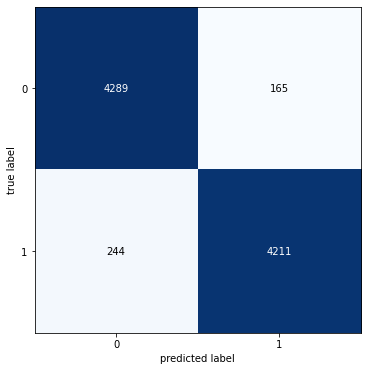

In [ ]:
# predictions based on the Naive Bayes classifier 
from mlxtend.plotting import plot_confusion_matrix

predictions4=pipeline4.predict(x_val)
cm = confusion_matrix(y_val, predictions4) 

print(confusion_matrix(y_val, predictions4))
print('\n')
print(classification_report(y_val, predictions4))


plot_confusion_matrix(cm, figsize=(6,6))

[[6137  227]
 [ 367 5996]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6364
           1       0.96      0.94      0.95      6363

    accuracy                           0.95     12727
   macro avg       0.95      0.95      0.95     12727
weighted avg       0.95      0.95      0.95     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f945e587d50>)

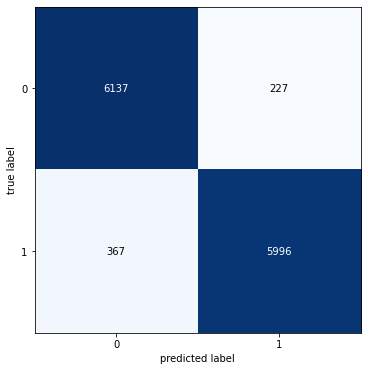

In [ ]:
# predictions based on the Naive Bayes classifier 

predictions4=pipeline4.predict(x_test)
cm = confusion_matrix(y_test, predictions4) 

print(confusion_matrix(y_test, predictions4))
print('\n')
print(classification_report(y_test, predictions4))

plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
distributions = dict(max_depth=[4,5,6], min_child_weight=[4,5,6],  gamma=[i/10.0 for i in range(0,5)], subsample=[i/10.0 for i in range(6,10)], colsample_bytree=[i/10.0 for i in range(6,10)])   
    
model = XGBClassifier()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)      # using RandomizedSearchCV for finding the best parameters for the classifier


model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

Best Score:  0.9799864111867962
Best Params:  {'subsample': 0.7, 'min_child_weight': 4, 'max_depth': 6, 'gamma': 0.3, 'colsample_bytree': 0.8}


In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV
from xgboost.sklearn import XGBClassifier
pipeline8=Pipeline([
    ('bow',TfidfVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',XGBClassifier(subsample=0.7, min_child_weight=4, max_depth=6, gamma=0.3, colsample_bytree=0.8))
    ])


pipeline8.fit(x_train,y_train)

Pipeline(steps=[('bow', TfidfVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier',
                 XGBClassifier(colsample_bytree=0.8, gamma=0.3, max_depth=6,
                               min_child_weight=4, subsample=0.7))])

[[4435   19]
 [  10 4445]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4454
           1       1.00      1.00      1.00      4455

    accuracy                           1.00      8909
   macro avg       1.00      1.00      1.00      8909
weighted avg       1.00      1.00      1.00      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9451b26850>)

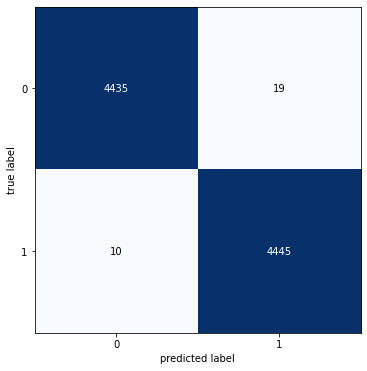

In [ ]:
# predictions based on the XGBoost classifier

predictions8=pipeline8.predict(x_val)
cm = confusion_matrix(y_val, predictions8) 
print(confusion_matrix(y_val, predictions8))
print('\n')
print(classification_report(y_val, predictions8))
plot_confusion_matrix(cm, figsize=(6,6))

[[6337   27]
 [  15 6348]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6364
           1       1.00      1.00      1.00      6363

    accuracy                           1.00     12727
   macro avg       1.00      1.00      1.00     12727
weighted avg       1.00      1.00      1.00     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f94515bd690>)

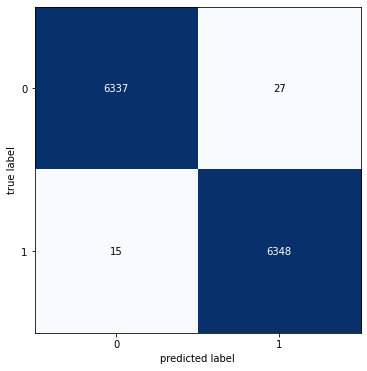

In [ ]:
# predictions based on the XGBoost classifier

predictions8=pipeline8.predict(x_test)
cm = confusion_matrix(y_test, predictions8) 
print(confusion_matrix(y_test, predictions8))
print('\n')
print(classification_report(y_test, predictions8))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
# using RandomizedSearchCV for finding the best parameters for the classifier

distributions = dict(n_estimators =[200, 400, 600], max_features=['auto', 'sqrt', 'log2'], max_depth= [2,3,4], criterion=['gini', 'entropy'])
model = RandomForestClassifier()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)


model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Best Score:  0.7771576840376456
Best Params:  {'n_estimators': 600, 'max_features': 'log2', 'max_depth': 4, 'criterion': 'gini'}


In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline12=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier(criterion='gini', max_depth=4, max_features='log2', n_estimators=600))
    ])

pipeline12.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7f94612cd440>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 RandomForestClassifier(max_depth=4, max_features='log2',
                                        n_estimators=600))])

[[4117  337]
 [ 171 4284]]


              precision    recall  f1-score   support

           0       0.96      0.92      0.94      4454
           1       0.93      0.96      0.94      4455

    accuracy                           0.94      8909
   macro avg       0.94      0.94      0.94      8909
weighted avg       0.94      0.94      0.94      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9452364550>)

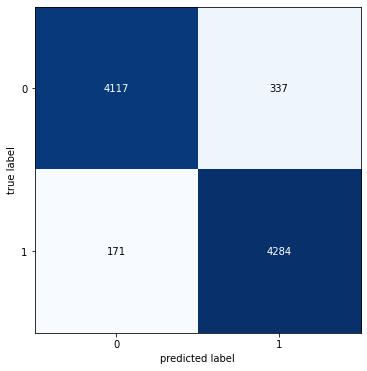

In [ ]:
# predictions based on the Random Forest classifier

predictions12=pipeline12.predict(x_val)
cm = confusion_matrix(y_val, predictions12) 
print(confusion_matrix(y_val, predictions12))
print('\n')
print(classification_report(y_val, predictions12))
plot_confusion_matrix(cm, figsize=(6,6))

[[5909  455]
 [ 290 6073]]


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      6364
           1       0.93      0.95      0.94      6363

    accuracy                           0.94     12727
   macro avg       0.94      0.94      0.94     12727
weighted avg       0.94      0.94      0.94     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9451fab550>)

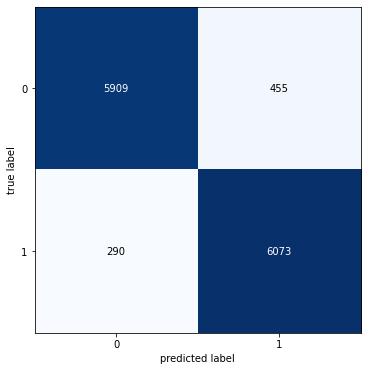

In [ ]:
# predictions based on the Random Forest classifier

predictions12=pipeline12.predict(x_test)
cm = confusion_matrix(y_test, predictions12) 
print(confusion_matrix(y_test, predictions12))
print('\n')
print(classification_report(y_test, predictions12))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# using RandomizedSearchCV for finding the best parameters for the classifier

distributions = dict(C =[0.003, 0.01, 0.03, 0.1],  loss= ['hinge', 'squared_hinge'], n_iter_no_change= [5, 10, 30, 100, 300] )
model = PassiveAggressiveClassifier()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)


model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Score:  0.5204919164264847
Best Params:  {'n_iter_no_change': 30, 'loss': 'hinge', 'C': 0.03}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline16=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier(C=0.03, loss='hinge', n_iter_no_change=30))
    ])

pipeline16.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7f94612cd440>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 PassiveAggressiveClassifier(C=0.03, n_iter_no_change=30))])

[[4381   73]
 [  36 4419]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4454
           1       0.98      0.99      0.99      4455

    accuracy                           0.99      8909
   macro avg       0.99      0.99      0.99      8909
weighted avg       0.99      0.99      0.99      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f94502859d0>)

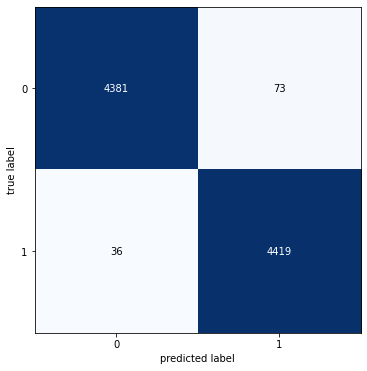

In [ ]:
# predictions based on the Passive Aggressive classifier

predictions16=pipeline16.predict(x_val)
cm = confusion_matrix(y_val, predictions16)
print(confusion_matrix(y_val, predictions16))
print('\n')
print(classification_report(y_val, predictions16))
plot_confusion_matrix(cm, figsize=(6,6))

[[6263  101]
 [  68 6295]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6364
           1       0.98      0.99      0.99      6363

    accuracy                           0.99     12727
   macro avg       0.99      0.99      0.99     12727
weighted avg       0.99      0.99      0.99     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9451face50>)

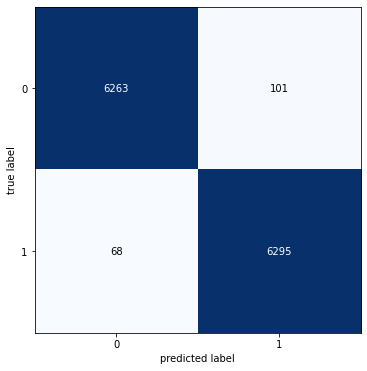

In [ ]:
# predictions based on the Passive Aggressive classifier

predictions16=pipeline16.predict(x_test)
cm = confusion_matrix(y_test, predictions16)
print(confusion_matrix(y_test, predictions16))
print('\n')
print(classification_report(y_test, predictions16))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
distributions = dict(solver= ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], penalty= ['l1', 'l2', 'elasticnet', 'none'])
model = LogisticRegression()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)      # using RandomizedSearchCV for finding the best parameters for the classifier

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Score:  0.5403634845540066
Best Params:  {'solver': 'liblinear', 'penalty': 'l1'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error

In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline20=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression(solver='liblinear', penalty='l1'))
    ])

pipeline20.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7f94612cd440>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

[[4404   50]
 [  48 4407]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4454
           1       0.99      0.99      0.99      4455

    accuracy                           0.99      8909
   macro avg       0.99      0.99      0.99      8909
weighted avg       0.99      0.99      0.99      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f944f5f3110>)

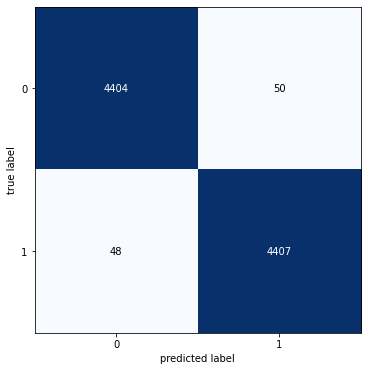

In [ ]:
# predictions based on the Logitistic Regression classifier

predictions20=pipeline20.predict(x_val)
cm = confusion_matrix(y_val, predictions20)
print(confusion_matrix(y_val, predictions20))
print('\n')
print(classification_report(y_val, predictions20))
plot_confusion_matrix(cm, figsize=(6,6))

[[6304   60]
 [  51 6312]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6364
           1       0.99      0.99      0.99      6363

    accuracy                           0.99     12727
   macro avg       0.99      0.99      0.99     12727
weighted avg       0.99      0.99      0.99     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f944f59c190>)

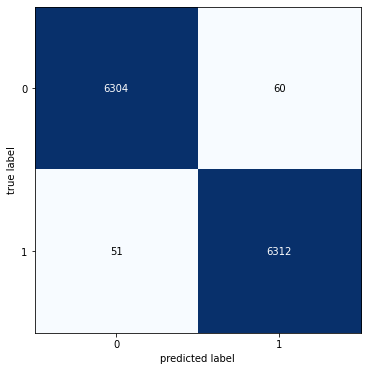

In [ ]:
# predictions based on the Logitistic Regression classifier

predictions20=pipeline20.predict(x_test)
cm = confusion_matrix(y_test, predictions20)
print(confusion_matrix(y_test, predictions20))
print('\n')
print(classification_report(y_test, predictions20))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

distributions = dict(loss= ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge' ],
          penalty = ['l1', 'l2', 'elasticnet', 'none'])
model = SGDClassifier()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)      # using RandomizedSearchCV for finding the best parameters for the classifier

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Score:  0.5154914900404436
Best Params:  {'penalty': 'l1', 'loss': 'log'}


In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline24=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SGDClassifier(penalty= 'l1', loss='log'))
    ])

pipeline24.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7f94612cd440>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', SGDClassifier(loss='log', penalty='l1'))])

[[4321  133]
 [ 146 4309]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4454
           1       0.97      0.97      0.97      4455

    accuracy                           0.97      8909
   macro avg       0.97      0.97      0.97      8909
weighted avg       0.97      0.97      0.97      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f944e8ff4d0>)

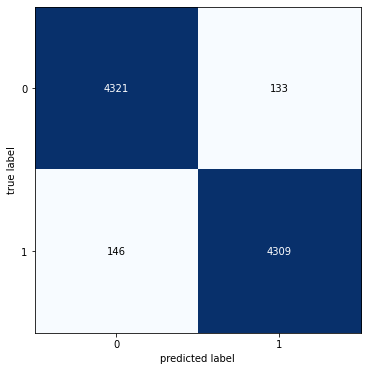

In [ ]:
# predictions based on the Naive Bayes classifier 

predictions24=pipeline24.predict(x_val)

cm = confusion_matrix(y_val, predictions24)
print(confusion_matrix(y_val, predictions24))
print('\n')
print(classification_report(y_val, predictions24))

plot_confusion_matrix(cm, figsize=(6,6))

[[6161  203]
 [ 201 6162]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6364
           1       0.97      0.97      0.97      6363

    accuracy                           0.97     12727
   macro avg       0.97      0.97      0.97     12727
weighted avg       0.97      0.97      0.97     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f944e8d6bd0>)

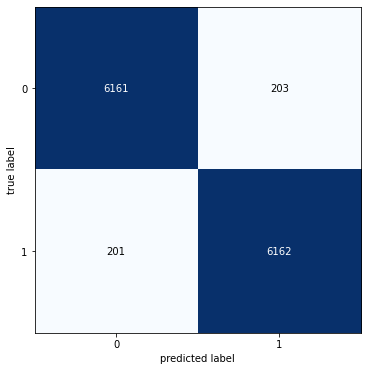

In [ ]:
# predictions based on the Naive Bayes classifier 

predictions24=pipeline24.predict(x_test)

cm = confusion_matrix(y_test, predictions24)
print(confusion_matrix(y_test, predictions24))
print('\n')
print(classification_report(y_test, predictions24))

plot_confusion_matrix(cm, figsize=(6,6)) 